## Plotting preferences

In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

In [2]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 25

detection_colours = sns.color_palette("hls", 4)
dark_colours = sns.color_palette("viridis", 8)
my_colours = sns.color_palette("husl", 8)

cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

alpha = 0.7

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

## Data 

In [3]:
# Importing data file 
df_original = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')

In [33]:
#  add the absolute gaia K band magnitude and stellar mass
df_original['m_p'] = 10**df_original['Inj.1P log(m_p)']

# cut off certain range 
df = df_original[(0.3 <= df_original.m_p) & (df_original.m_p <= 3)].reset_index(drop=True)

print(len(df_original))
print(len(df))

10000
6130


In [116]:
# total number of samples
total_number = len(df_original)
print('There are {:.0f} systems'.format(total_number))

# total number of detected 
total_detected = df_original['Detection'].sum()
print('There are {:.0f} systems detected'.format(total_detected))

overall_sensitivty = total_detected / total_number
print('Sensitivity: {:.2}'.format(overall_sensitivty*100))

# uncertainty 
overall_sensitivty_uncertainty = np.sqrt(total_detected) / total_number
print('Sensitivity Uncertainty: {:.1}'.format(overall_sensitivty_uncertainty*100))


There are 10000 systems
There are 1536 systems detected
Sensitivity: 1.5e+01
Sensitivity Uncertainty: 0.4


In [117]:
# total number of samples
total_number = len(df)
print('There are {:.0f} systems'.format(total_number))

# total number of detected 
total_detected = df['Detection'].sum()
print('There are {:.0f} systems detected'.format(total_detected))

overall_sensitivty = total_detected / total_number
print('Sensitivity: {:.3}'.format(overall_sensitivty*100))

# uncertainty 
overall_sensitivty_uncertainty = np.sqrt(total_detected) / total_number
print('Sensitivity Uncertainty: {:.1}'.format(overall_sensitivty_uncertainty*100))


There are 6130 systems
There are 321 systems detected
Sensitivity: 5.24
Sensitivity Uncertainty: 0.3


In [35]:
np.sqrt(1536)/10000

0.0039191835884530846

### Bins

In [36]:
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]

In [37]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(3), 20) 
Pbins = np.logspace(-2, 1, 20) 

# Number of bins 
num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

# Midpoints of the bins 
Mbin_midpoints = (Mbins[:-1] + Mbins[1:]) / 2
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

# Histograms

## Period $P$

In [69]:
Pbins = np.logspace(-2, 1, 20) 
num_Pbins = len(Pbins) - 1
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

In [109]:
num_planets_per_P_bin       = np.zeros(num_Pbins+1)
num_detected_Pbin           = np.zeros(num_Pbins+1)
sensitivity_Pbins           = np.zeros(num_Pbins+1)
detection_uncertainty_Pbins = np.zeros(num_Pbins+1)

# Iterate through each Period bin
for i, P in enumerate(Pbins):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (inj_period_data >= Pbins[i]) 

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_P_bin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_Pbin[i] = detected.sum()

    sensitivity_Pbins[i] = num_detected_Pbin[i]/ num_planets_per_P_bin[i]
    detection_uncertainty_Pbins[i] = np.sqrt(num_detected_Pbin[i])/ num_planets_per_P_bin[i]
    
    print(f"Period range = {Pbins[i]:.3f} , Sensitivity = {sensitivity_Pbins[i]:.3f}")

Period range = 0.010 , Sensitivity = 0.052
Period range = 0.014 , Sensitivity = 0.055
Period range = 0.021 , Sensitivity = 0.059
Period range = 0.030 , Sensitivity = 0.063
Period range = 0.043 , Sensitivity = 0.067
Period range = 0.062 , Sensitivity = 0.071
Period range = 0.089 , Sensitivity = 0.077
Period range = 0.127 , Sensitivity = 0.082
Period range = 0.183 , Sensitivity = 0.088
Period range = 0.264 , Sensitivity = 0.094
Period range = 0.379 , Sensitivity = 0.101
Period range = 0.546 , Sensitivity = 0.110
Period range = 0.785 , Sensitivity = 0.115
Period range = 1.129 , Sensitivity = 0.129
Period range = 1.624 , Sensitivity = 0.138
Period range = 2.336 , Sensitivity = 0.140
Period range = 3.360 , Sensitivity = 0.146
Period range = 4.833 , Sensitivity = 0.128
Period range = 6.952 , Sensitivity = 0.109
Period range = 10.000 , Sensitivity = nan


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/1514128432.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_Pbins[i] = num_detected_Pbin[i]/ num_planets_per_P_bin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/1514128432.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_Pbins[i] = np.sqrt(num_detected_Pbin[i])/ num_planets_per_P_bin[i]


In [111]:
num_planets_per_P_bin       = np.zeros(num_Pbins)
num_detected_Pbin           = np.zeros(num_Pbins)
sensitivity_Pbins           = np.zeros(num_Pbins)
detection_uncertainty_Pbins = np.zeros(num_Pbins)

# Iterate through each Period bin
for i, P in enumerate(Pbins[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_P_bin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_Pbin[i] = detected.sum()

    sensitivity_Pbins[i] = num_detected_Pbin[i]/ num_planets_per_P_bin[i]
    detection_uncertainty_Pbins[i] = np.sqrt(num_detected_Pbin[i])/ num_planets_per_P_bin[i]
    
    print(f"Period range = {Pbins[i]:.3f} - {Pbins[i+1]:.3f}, Sensitivity = {sensitivity_Pbins[i]:.3f}, +/- {detection_uncertainty_Pbins[i]:.3f}")

Period range = 0.010 - 0.014, Sensitivity = 0.000, +/- 0.000
Period range = 0.014 - 0.021, Sensitivity = 0.000, +/- 0.000
Period range = 0.021 - 0.030, Sensitivity = 0.000, +/- 0.000
Period range = 0.030 - 0.043, Sensitivity = 0.000, +/- 0.000
Period range = 0.043 - 0.062, Sensitivity = 0.003, +/- 0.003
Period range = 0.062 - 0.089, Sensitivity = 0.000, +/- 0.000
Period range = 0.089 - 0.127, Sensitivity = 0.004, +/- 0.004
Period range = 0.127 - 0.183, Sensitivity = 0.022, +/- 0.008
Period range = 0.183 - 0.264, Sensitivity = 0.017, +/- 0.007
Period range = 0.264 - 0.379, Sensitivity = 0.025, +/- 0.009
Period range = 0.379 - 0.546, Sensitivity = 0.032, +/- 0.010
Period range = 0.546 - 0.785, Sensitivity = 0.072, +/- 0.015
Period range = 0.785 - 1.129, Sensitivity = 0.030, +/- 0.009
Period range = 1.129 - 1.624, Sensitivity = 0.086, +/- 0.016
Period range = 1.624 - 2.336, Sensitivity = 0.130, +/- 0.020
Period range = 2.336 - 3.360, Sensitivity = 0.123, +/- 0.020
Period range = 3.360 - 4

Text(0.01, 0.93, '(a)')

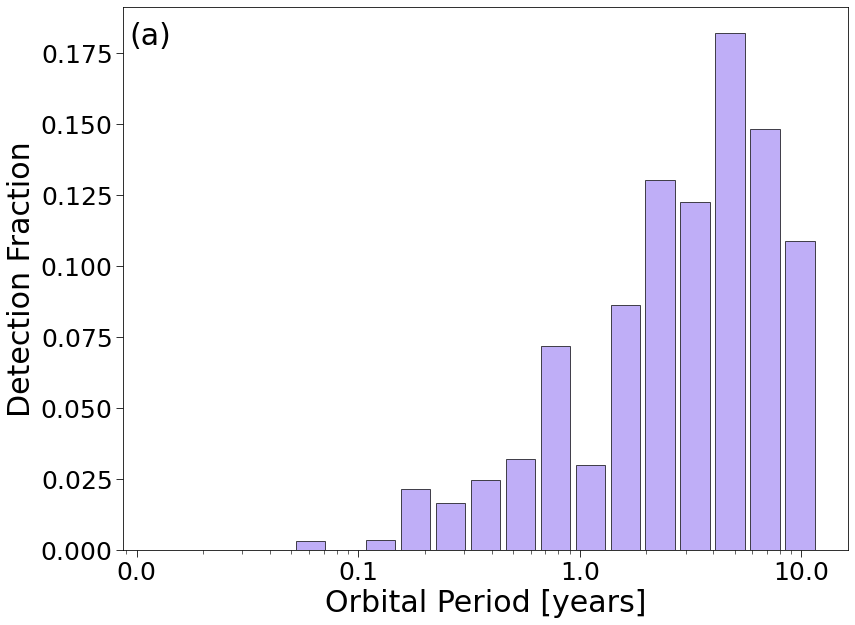

In [71]:
Pbar_width = np.diff(Pbins)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the sensitivity values as a bar graph

# ax.bar(Pbin_midpoints, 
#         cumulative_sensitivity_P[:-1], 
#         color=my_colours[5], 
#         edgecolor='black',
#         alpha=1,
#         align="edge",
#         width = Pbar_width,
#         label='Sensitivity for P > x',)


ax.bar(Pbin_midpoints,
       sensitivity_Pbins,
       width=Pbar_width,
       color=my_colours[6], 
       alpha=alpha, 
       edgecolor='black',
       align="edge",
       label='Sensitivity in Each P Bin')


# ax.plot(Pbin_midpoints, 
#         sensitivity_Pbins, 
#         marker='o', 
#         linestyle='-', 
#         color=my_colours[0], 
#         label='Sensitivity (line)')



# # # Plot the sensitivity values as a line plot on top of the bar graph
# ax.plot(Pbin_midpoints, 
#         sensitivity_values_P[:-1], 
#         marker='o', 
#         linestyle='-', 
#         color='skyblue', 
#         label='Sensitivity (line)')

# Axes labels 
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Detection Fraction', fontsize=axis_label_font)

# add legned
# ax.legend(fontsize=legend_font)


# Set x-axis to log scale
ax.set_xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.text(0.01, 0.93, '(a)', transform=ax.transAxes, fontsize=axis_label_font)

## Stellar Mass $M_*$

In [72]:
print('Min: ', df['Stellar Mass'].min())
print('Max: ', df['Stellar Mass'].max())

Min:  0.0735588461744077
Max:  0.7436028289014885


In [73]:
MstarBin = np.linspace(0.07, 0.8, 20) 
num_MstarBin = len(MstarBin) - 1
MstarBin_midpoints = (MstarBin[:-1] + MstarBin[1:]) / 2

In [104]:
num_planets_per_MstarBin       = np.zeros(num_MstarBin)
num_detected_MstarBin         = np.zeros(num_MstarBin)
sensitivity_MstarBin          = np.zeros(num_MstarBin)
detection_uncertainty_MstarBin = np.zeros(num_MstarBin)

# Iterate through each Period bin
for i, M in enumerate(MstarBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['Stellar Mass'] >= MstarBin[i]) 

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_MstarBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_MstarBin[i] = detected.sum()

    sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
    detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]
    
    print(f"Period range = {MstarBin[i]:.3f}, Sensitivity = {sensitivity_MstarBin[i]:.3f}")

Period range = 0.070, Sensitivity = 0.052
Period range = 0.108, Sensitivity = 0.059
Period range = 0.147, Sensitivity = 0.064
Period range = 0.185, Sensitivity = 0.066
Period range = 0.224, Sensitivity = 0.067
Period range = 0.262, Sensitivity = 0.066
Period range = 0.301, Sensitivity = 0.067
Period range = 0.339, Sensitivity = 0.067
Period range = 0.377, Sensitivity = 0.068
Period range = 0.416, Sensitivity = 0.071
Period range = 0.454, Sensitivity = 0.072
Period range = 0.493, Sensitivity = 0.074
Period range = 0.531, Sensitivity = 0.070
Period range = 0.569, Sensitivity = 0.068
Period range = 0.608, Sensitivity = 0.065
Period range = 0.646, Sensitivity = 0.066
Period range = 0.685, Sensitivity = 0.088
Period range = 0.723, Sensitivity = 0.147
Period range = 0.762, Sensitivity = nan


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/808180361.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/808180361.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]


In [74]:
num_planets_per_MstarBin       = np.zeros(num_MstarBin)
num_detected_MstarBin         = np.zeros(num_MstarBin)
sensitivity_MstarBin          = np.zeros(num_MstarBin)
detection_uncertainty_MstarBin = np.zeros(num_MstarBin)

# Iterate through each Period bin
for i, M in enumerate(MstarBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['Stellar Mass'] >= MstarBin[i]) & (df['Stellar Mass'] < MstarBin[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_MstarBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_MstarBin[i] = detected.sum()

    sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
    detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]
    
    print(f"Period range = {MstarBin[i]:.3f} - {MstarBin[i+1]:.3f}, Sensitivity = {sensitivity_MstarBin[i]:.3f}")

Period range = 0.070 - 0.108, Sensitivity = 0.010
Period range = 0.108 - 0.147, Sensitivity = 0.019
Period range = 0.147 - 0.185, Sensitivity = 0.051
Period range = 0.185 - 0.224, Sensitivity = 0.064
Period range = 0.224 - 0.262, Sensitivity = 0.072
Period range = 0.262 - 0.301, Sensitivity = 0.060
Period range = 0.301 - 0.339, Sensitivity = 0.063
Period range = 0.339 - 0.377, Sensitivity = 0.065
Period range = 0.377 - 0.416, Sensitivity = 0.051
Period range = 0.416 - 0.454, Sensitivity = 0.065
Period range = 0.454 - 0.493, Sensitivity = 0.061
Period range = 0.493 - 0.531, Sensitivity = 0.091
Period range = 0.531 - 0.569, Sensitivity = 0.084
Period range = 0.569 - 0.608, Sensitivity = 0.076
Period range = 0.608 - 0.646, Sensitivity = 0.063
Period range = 0.646 - 0.685, Sensitivity = 0.034
Period range = 0.685 - 0.723, Sensitivity = 0.068
Period range = 0.723 - 0.762, Sensitivity = 0.147
Period range = 0.762 - 0.800, Sensitivity = nan


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/4133633892.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/4133633892.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]


Text(0.01, 0.93, '(d)')

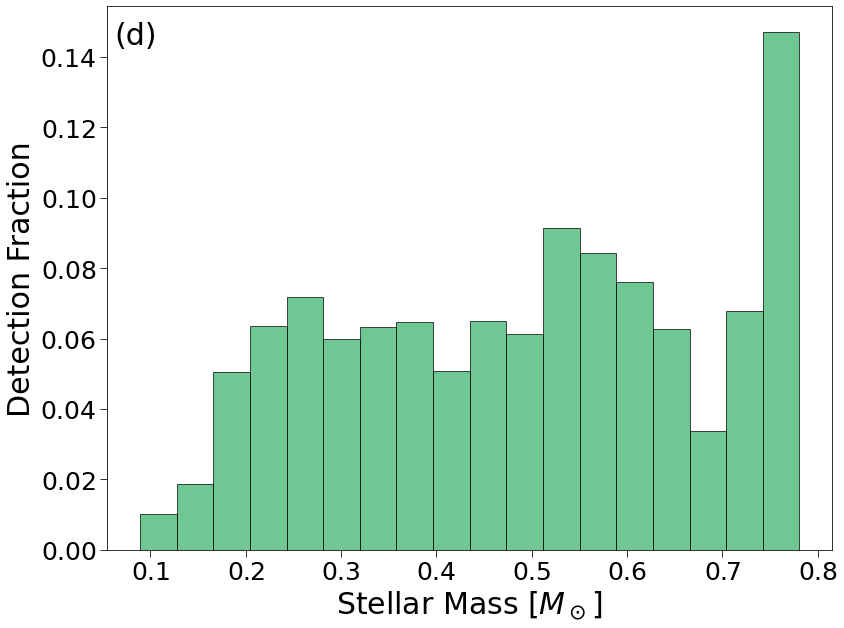

In [75]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the sensitivity values as a bar graph

ax.bar(MstarBin_midpoints,
       sensitivity_MstarBin,
       width = np.diff(MstarBin),
       color=my_colours[3], 
       alpha=alpha, 
       edgecolor='black',
       align="edge",
       label='Sensitivity in Each P Bin')


# Axes labels 
ax.set_xlabel('Stellar Mass [$M_\odot$]', fontsize=axis_label_font)
ax.set_ylabel('Detection Fraction', fontsize=axis_label_font)

# add legned
# ax.legend(fontsize=legend_font)



# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.text(0.01, 0.93, '(d)', transform=ax.transAxes, fontsize=axis_label_font)

## Signal to Noise $S/N$

In [76]:
print('Min: ', df['S/N'].min())
print('Max: ', df['S/N'].max())

Min:  0.0143129444470995
Max:  29.755899859193168


In [77]:
SNBin = np.logspace(np.log10(df['S/N'].min()), np.log10(df['S/N'].max()), 20) 
num_SNBin = len(SNBin) - 1
SNBin_midpoints = (SNBin[:-1] + SNBin[1:]) / 2

In [102]:
num_planets_per_SNBin       = np.zeros(num_SNBin)
num_detected_SNBin         = np.zeros(num_SNBin)
sensitivity_SNBin          = np.zeros(num_SNBin)
detection_uncertainty_SNBin = np.zeros(num_SNBin)

# Iterate through each Period bin
for i, M in enumerate(SNBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['S/N'] >= SNBin[i]) 

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_SNBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_SNBin[i] = detected.sum()

    sensitivity_SNBin[i] = num_detected_SNBin[i]/ num_planets_per_SNBin[i]
    detection_uncertainty_SNBin[i] = np.sqrt(num_detected_SNBin[i])/ num_planets_per_SNBin[i]
    
    print(f"SN = {SNBin[i]:.3f} ,  Sensitivity = {sensitivity_SNBin[i]:.3f} +/- {detection_uncertainty_SNBin[i]:.3f}")

SN = 0.014 ,  Sensitivity = 0.054 +/- 0.003
SN = 0.021 ,  Sensitivity = 0.055 +/- 0.003
SN = 0.032 ,  Sensitivity = 0.055 +/- 0.003
SN = 0.048 ,  Sensitivity = 0.056 +/- 0.003
SN = 0.071 ,  Sensitivity = 0.058 +/- 0.003
SN = 0.107 ,  Sensitivity = 0.061 +/- 0.003
SN = 0.160 ,  Sensitivity = 0.068 +/- 0.004
SN = 0.239 ,  Sensitivity = 0.080 +/- 0.004
SN = 0.357 ,  Sensitivity = 0.100 +/- 0.006
SN = 0.534 ,  Sensitivity = 0.133 +/- 0.008
SN = 0.798 ,  Sensitivity = 0.183 +/- 0.011
SN = 1.193 ,  Sensitivity = 0.261 +/- 0.018
SN = 1.783 ,  Sensitivity = 0.392 +/- 0.032
SN = 2.666 ,  Sensitivity = 0.500 +/- 0.053
SN = 3.985 ,  Sensitivity = 0.602 +/- 0.085
SN = 5.958 ,  Sensitivity = 0.694 +/- 0.139
SN = 8.906 ,  Sensitivity = 0.667 +/- 0.236
SN = 13.315 ,  Sensitivity = 1.000 +/- 0.447
SN = 19.904 ,  Sensitivity = 1.000 +/- 1.000


In [78]:
num_planets_per_SNBin       = np.zeros(num_SNBin)
num_detected_SNBin         = np.zeros(num_SNBin)
sensitivity_SNBin          = np.zeros(num_SNBin)
detection_uncertainty_SNBin = np.zeros(num_SNBin)

# Iterate through each Period bin
for i, M in enumerate(SNBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['S/N'] >= SNBin[i]) & (df['S/N'] < SNBin[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_SNBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_SNBin[i] = detected.sum()

    sensitivity_SNBin[i] = num_detected_SNBin[i]/ num_planets_per_SNBin[i]
    detection_uncertainty_SNBin[i] = np.sqrt(num_detected_SNBin[i])/ num_planets_per_SNBin[i]
    
    print(f"SN range = {SNBin[i]:.3f} - {SNBin[i+1]:.3f},  num in each bin =  {num_planets_per_SNBin[i]:.3f}, Sensitivity = {sensitivity_SNBin[i]:.3f} +/- {detection_uncertainty_SNBin[i]:.3f}")

SN range = 0.014 - 0.021,  num in each bin =  19.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.021 - 0.032,  num in each bin =  24.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.032 - 0.048,  num in each bin =  89.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.048 - 0.071,  num in each bin =  193.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.071 - 0.107,  num in each bin =  326.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.107 - 0.160,  num in each bin =  529.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.160 - 0.239,  num in each bin =  737.000, Sensitivity = 0.003 +/- 0.002
SN range = 0.239 - 0.357,  num in each bin =  817.000, Sensitivity = 0.002 +/- 0.002
SN range = 0.357 - 0.534,  num in each bin =  900.000, Sensitivity = 0.019 +/- 0.005
SN range = 0.534 - 0.798,  num in each bin =  774.000, Sensitivity = 0.037 +/- 0.007
SN range = 0.798 - 1.193,  num in each bin =  633.000, Sensitivity = 0.077 +/- 0.011
SN range = 1.193 - 1.783,  num in each bin =  465.000, Sensitivity =

/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/2825652536.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_SNBin[i] = num_detected_SNBin[i]/ num_planets_per_SNBin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/2825652536.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_SNBin[i] = np.sqrt(num_detected_SNBin[i])/ num_planets_per_SNBin[i]


Text(0.01, 0.93, '(c)')

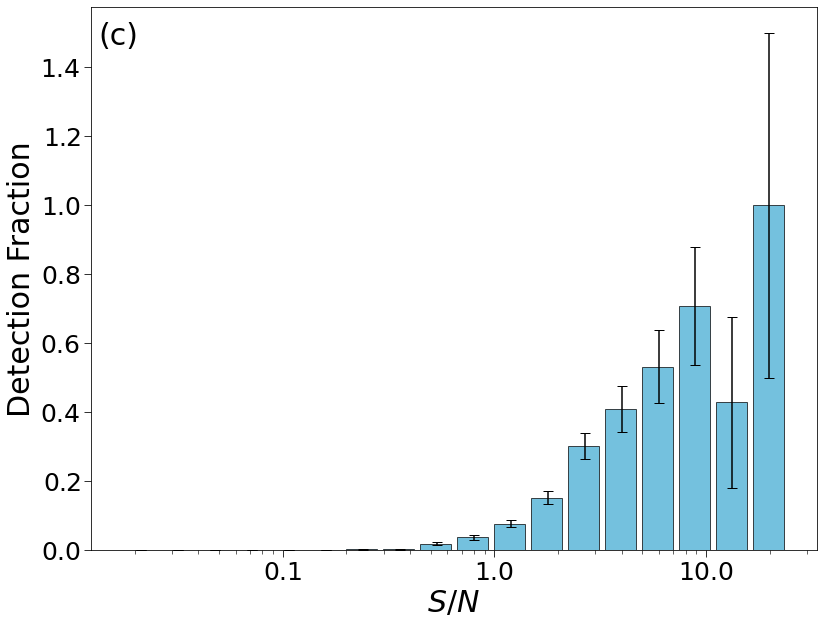

In [79]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the sensitivity values as a bar graph

ax.bar(SNBin_midpoints,
       sensitivity_SNBin,
       yerr=detection_uncertainty_SNBin,
       capsize=5,
       width=np.diff(SNBin),
       color=my_colours[5], 
       alpha=alpha, 
       edgecolor='black',
       align="edge",
       label='Sensitivity in Each P Bin')


# Axes labels 
ax.set_xlabel('$S/N$', fontsize=axis_label_font)
ax.set_ylabel('Detection Fraction', fontsize=axis_label_font)

# add legned
# ax.legend(fontsize=legend_font)

ax.set_xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.text(0.01, 0.93, '(c)', transform=ax.transAxes, fontsize=axis_label_font)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


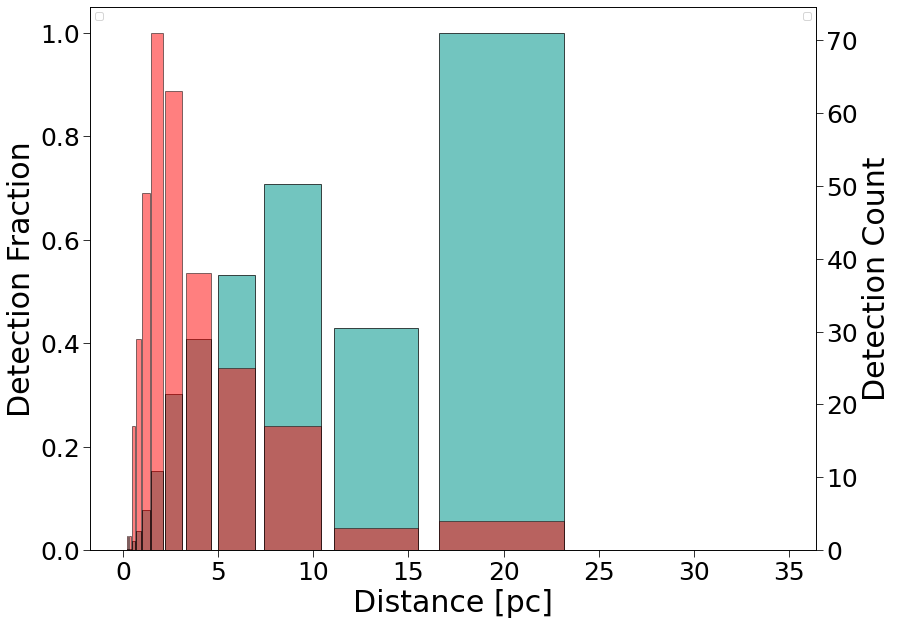

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(13, 10))

# Plot the first set of bars with the primary y-axis (left)
ax1.bar(SNBin_midpoints,
       sensitivity_SNBin,
       width=np.diff(SNBin),
       color=my_colours[4], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")


# Create a secondary y-axis for the second set of bars (right)
ax2 = ax1.twinx()
ax2.bar(SNBin_midpoints,
       num_detected_SNBin,
       width=np.diff(SNBin),
       color='red', 
       alpha=0.5, 
       edgecolor='black',
       align="edge")

ax2.set_ylabel('Data 2', fontsize=14)
ax2.tick_params(axis='y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



# Axes labels 
ax1.set_xlabel('Distance [pc]', fontsize=axis_label_font)

ax1.set_ylabel('Detection Fraction', fontsize=axis_label_font)
ax2.set_ylabel('Detection Count', fontsize=axis_label_font)


# Set x-axis tick parameters
ax1.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax1.tick_params(which='minor', length=4)

ax2.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax2.tick_params(which='minor', length=4)



## Distance $d$

In [81]:
print('Min: ', df['Distance'].min())
print('Max: ', df['Distance'].max())

Min:  5.620149134079134
Max:  99.9925758150458


In [98]:
# DBin = np.linspace(0, 100, 20) 

DBin = np.logspace(np.log10(0.0000001), np.log10(100), 50) 


num_DBin = len(DBin) - 1
DBin_midpoints = (DBin[:-1] + DBin[1:]) / 2

In [99]:
num_planets_per_DBin       = np.zeros(num_DBin)
num_detected_DBin         = np.zeros(num_DBin)
sensitivity_DBin          = np.zeros(num_DBin)
detection_uncertainty_DBin = np.zeros(num_DBin)

# Iterate through each Period bin
for i, M in enumerate(DBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['Distance'] >= DBin[i]) & (df['Distance'] < DBin[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_DBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_DBin[i] = detected.sum()

    sensitivity_DBin[i] = num_detected_DBin[i]/ num_planets_per_DBin[i]
    detection_uncertainty_DBin[i] = np.sqrt(num_detected_DBin[i])/ num_planets_per_DBin[i]
    
    print(f"Period range = {DBin[i]:.5f} - {DBin[i+1]:.3f}, Sensitivity = {sensitivity_Pbins[i]:.3f}")

Period range = 0.00000 - 0.000, Sensitivity = 0.000
Period range = 0.00000 - 0.000, Sensitivity = 0.000
Period range = 0.00000 - 0.000, Sensitivity = 0.000
Period range = 0.00000 - 0.000, Sensitivity = 0.000
Period range = 0.00000 - 0.000, Sensitivity = 0.003
Period range = 0.00000 - 0.000, Sensitivity = 0.000
Period range = 0.00000 - 0.000, Sensitivity = 0.004
Period range = 0.00000 - 0.000, Sensitivity = 0.022
Period range = 0.00000 - 0.000, Sensitivity = 0.017
Period range = 0.00000 - 0.000, Sensitivity = 0.025
Period range = 0.00001 - 0.000, Sensitivity = 0.032
Period range = 0.00001 - 0.000, Sensitivity = 0.072
Period range = 0.00002 - 0.000, Sensitivity = 0.030
Period range = 0.00002 - 0.000, Sensitivity = 0.086
Period range = 0.00004 - 0.000, Sensitivity = 0.130
Period range = 0.00006 - 0.000, Sensitivity = 0.123
Period range = 0.00009 - 0.000, Sensitivity = 0.182
Period range = 0.00013 - 0.000, Sensitivity = 0.148
Period range = 0.00020 - 0.000, Sensitivity = 0.109


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/1320520217.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_DBin[i] = num_detected_DBin[i]/ num_planets_per_DBin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_88888/1320520217.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_DBin[i] = np.sqrt(num_detected_DBin[i])/ num_planets_per_DBin[i]


IndexError: index 19 is out of bounds for axis 0 with size 19

No handles with labels found to put in legend.
No handles with labels found to put in legend.


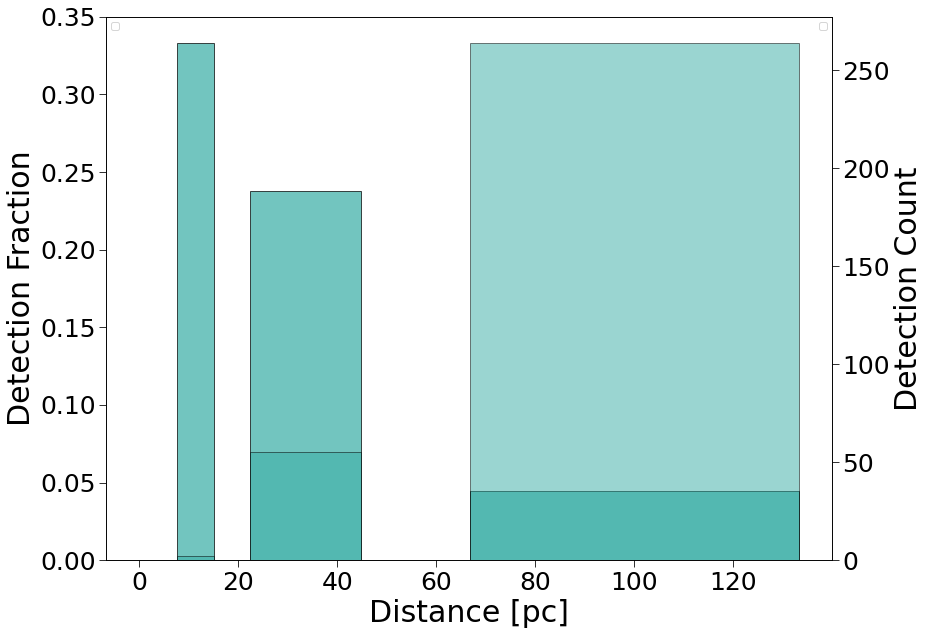

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(13, 10))

# Plot the first set of bars with the primary y-axis (left)
ax1.bar(DBin_midpoints,
       sensitivity_DBin,
       width=np.diff(DBin),
       color=my_colours[4], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")


# Create a secondary y-axis for the second set of bars (right)
ax2 = ax1.twinx()
ax2.bar(DBin_midpoints,
       num_detected_DBin,
       width=np.diff(DBin),
       color=my_colours[4], 
       alpha=0.5, 
       edgecolor='black',
       align="edge")

ax2.set_ylabel('Data 2', fontsize=14)
ax2.tick_params(axis='y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



# Axes labels 
ax1.set_xlabel('Distance [pc]', fontsize=axis_label_font)

ax1.set_ylabel('Detection Fraction', fontsize=axis_label_font)
ax2.set_ylabel('Detection Count', fontsize=axis_label_font)


# Set x-axis tick parameters
ax1.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax1.tick_params(which='minor', length=4)

ax2.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax2.tick_params(which='minor', length=4)



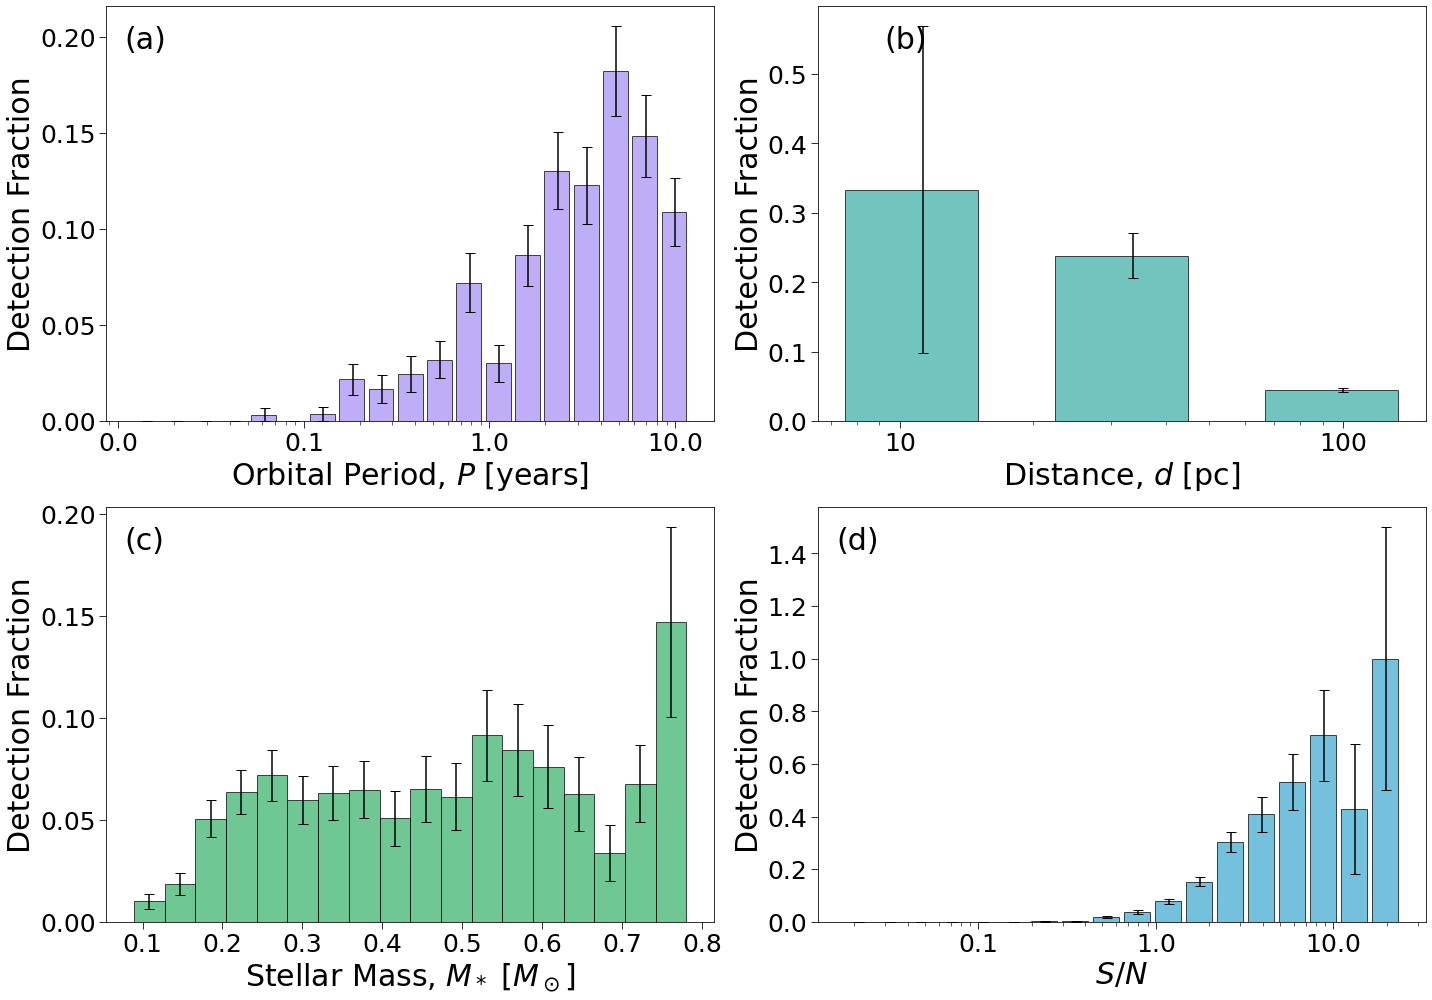

In [95]:
cs = 5

# Create a 4x4 figure of histograms
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot histogram for period (top left)
axs[0, 0].bar(Pbin_midpoints,
       sensitivity_Pbins,
       yerr=detection_uncertainty_Pbins,
       capsize=cs,
       width=Pbar_width,
       color=my_colours[6], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")

axs[0,0].set_xscale('log')

# Plot histogram for distance (bottom left)
axs[0, 1].bar(DBin_midpoints,
       sensitivity_DBin,
       yerr=detection_uncertainty_DBin,
       capsize=cs,
       width=np.diff(DBin),
       color=my_colours[4], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")

axs[0,1].set_xscale('log')
axs[0,1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Plot histogram stellar mass (bottom right)
axs[1, 0].bar(MstarBin_midpoints,
       sensitivity_MstarBin,
       yerr=detection_uncertainty_MstarBin,
       capsize=cs,
       width = np.diff(MstarBin),
       color=my_colours[3], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")

# Plot histogram stellar mass (bottom right)
axs[1, 1].bar(SNBin_midpoints,
       sensitivity_SNBin,
       yerr=detection_uncertainty_SNBin,
       capsize=cs,
       width=np.diff(SNBin),
       color=my_colours[5], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")

axs[1,1].set_xscale('log')
axs[1,1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))


# Axes labels 
axs[0,0].set_xlabel('Orbital Period, $P$ [years]', fontsize=axis_label_font)
axs[0, 1].set_xlabel('Distance, $d$ [pc]', fontsize=axis_label_font)
axs[1, 0].set_xlabel('Stellar Mass, $M_*$ [$M_\odot$]', fontsize=axis_label_font)
axs[1, 1].set_xlabel('$S/N$', fontsize=axis_label_font)

for i in range(2):
    for j in range(2):
        axs[i, j].set_ylabel('Detection Fraction', fontsize=axis_label_font)
        axs[i, j].tick_params(labelsize=axis_numbers_font, which='major', length=7)
        axs[i, j].tick_params(which='minor', length=4)

for i in range(1):
    for j in range(2):
        # Make x-axis lo
        
        # Make axes not scientific notation
        axs[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        # axs[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Add (a), (b), (c), (d)
axs[0, 0].text(0.03, 0.9, '(a)', transform=axs[0, 0].transAxes, fontsize=axis_label_font)
axs[0, 1].text(0.11, 0.9, '(b)', transform=axs[0, 1].transAxes, fontsize=axis_label_font)
axs[1, 0].text(0.03, 0.9, '(c)', transform=axs[1, 0].transAxes, fontsize=axis_label_font)
axs[1, 1].text(0.03, 0.9, '(d)', transform=axs[1, 1].transAxes, fontsize=axis_label_font)

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'JupiterAnalogDetectionFrac.pdf', dpi=300)

# Detection Conditions

In [96]:
# Sample data
conditions = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4', 'Detection']

pass_c1 = np.sum(df['Condition 1'])
pass_c2 = np.sum(df['Condition 2'])
pass_c3 = np.sum(df['Condition 3'])
pass_c4 = np.sum(df['Condition 4'])  
pass_det = np.sum(df['Detection'])

fail_c1 = len(df['Condition 1']) - pass_c1
fail_c2 = len(df['Condition 2']) - pass_c2
fail_c3 = len(df['Condition 3']) - pass_c3
fail_c4 = len(df['Condition 4']) - pass_c4
fail_det = len(df['Detection'])  - pass_det

pass_counts = [pass_c1, pass_c2, pass_c3, pass_c4, pass_det]  # Number of signals passing each condition
fail_counts = [fail_c1, fail_c2, fail_c3, fail_c4, fail_det]  # Number of signals failing each condition

# Calculate total counts (pass + fail) for each condition
total_counts = np.array(pass_counts) + np.array(fail_counts)

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6)) 

# Stacked bar plot
ax.bar(conditions, 
        pass_counts, 
        color=my_colours[3],
        edgecolor='black',
        alpha = alpha,
        label='Pass')

ax.bar(conditions, 
        fail_counts, 
        bottom=pass_counts, 
        color=detection_colours[0], 
        edgecolor='black',
        alpha = alpha,
        label='Fail')


#ax.set_xlabel('Conditions',fontsize = paper_axis_label_fs)
ax.set_ylabel('Number of Signals', fontsize = axis_label_font)

# plt.title('Pass/Fail Ratio for Each Condition', fontsize=paper_title_fs)

ax.tick_params(labelsize=20, which='major', length=7)
ax.tick_params(which='minor', length=4)
        

plt.legend(fontsize = 15)

plt.tight_layout()


## P 

In [54]:
# cumulative_sensitivity_P = []

# # Iterate over each combination of N and n
# for n in Pbins:
#     # Filter the DataFrame based on the current values of N and n
#     filtered_df = filtered_df = df[(inj_period_data > n)]

#     # Calculate sensitivity for the filtered DataFrame
#     sensitivity = filtered_df['Detection'].mean()  # Assuming detection column contains binary values

#     # Print or store the sensitivity along with the current values of N and n
#     print(f"We are sensitive to {sensitivity*100:.2f}% Jupiter analog planets with P>{n} years")
    
#     cumulative_sensitivity_P.append(sensitivity)

In [55]:
cumulative_sensitivity_P = []

# Initialize variables to store cumulative detections and planets per bin
cumulative_detections = 0
cumulative_planets_per_bin = 0

# Iterate over each Period bin
for i, P in enumerate(Pbins[:-1]):
    # Filter the DataFrame based on the current bin's upper limit
    filtered_df = df[inj_period_data > P]

    # Count the number of detections in the filtered DataFrame
    detections_in_bin = filtered_df['Detection'].sum()

    # Count the number of planets in the filtered DataFrame
    planets_in_bin = len(filtered_df)

    # Accumulate detections and planets
    cumulative_detections += detections_in_bin
    cumulative_planets_per_bin += planets_in_bin

    # Calculate cumulative sensitivity
    cumulative_sensitivity = cumulative_detections / cumulative_planets_per_bin

    # Print or store the cumulative sensitivity along with the current Period bin
    print(f"We are sensitive to {cumulative_sensitivity * 100:.2f}% Jupiter analog planets with P > {P} years")

    cumulative_sensitivity_P.append(cumulative_sensitivity)


We are sensitive to 5.24% Jupiter analog planets with P > 0.01 years
We are sensitive to 5.38% Jupiter analog planets with P > 0.01438449888287663 years
We are sensitive to 5.54% Jupiter analog planets with P > 0.0206913808111479 years
We are sensitive to 5.71% Jupiter analog planets with P > 0.029763514416313176 years
We are sensitive to 5.88% Jupiter analog planets with P > 0.04281332398719394 years
We are sensitive to 6.06% Jupiter analog planets with P > 0.06158482110660264 years
We are sensitive to 6.25% Jupiter analog planets with P > 0.08858667904100823 years
We are sensitive to 6.44% Jupiter analog planets with P > 0.12742749857031335 years
We are sensitive to 6.63% Jupiter analog planets with P > 0.18329807108324356 years
We are sensitive to 6.83% Jupiter analog planets with P > 0.26366508987303583 years
We are sensitive to 7.02% Jupiter analog planets with P > 0.37926901907322497 years
We are sensitive to 7.22% Jupiter analog planets with P > 0.5455594781168517 years
We are s

In [56]:
num_planets_per_P_bin       = np.zeros(num_Pbins)
num_detected_Pbin           = np.zeros(num_Pbins)
sensitivity_Pbins           = np.zeros(num_Pbins)
detection_uncertainty_Pbins = np.zeros(num_Pbins)

# Iterate through each Period bin
for i, P in enumerate(Pbins[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_P_bin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_Pbin[i] = detected.sum()

    sensitivity_Pbins[i] = num_detected_Pbin[i]/ num_planets_per_P_bin[i]
    
    print(f"Period range = {Pbins[i]:.3f} - {Pbins[i+1]:.3f}, Sensitivity = {sensitivity_Pbins[i]:.3f}")

Period range = 0.010 - 0.014, Sensitivity = 0.000
Period range = 0.014 - 0.021, Sensitivity = 0.000
Period range = 0.021 - 0.030, Sensitivity = 0.000
Period range = 0.030 - 0.043, Sensitivity = 0.000
Period range = 0.043 - 0.062, Sensitivity = 0.003
Period range = 0.062 - 0.089, Sensitivity = 0.000
Period range = 0.089 - 0.127, Sensitivity = 0.004
Period range = 0.127 - 0.183, Sensitivity = 0.022
Period range = 0.183 - 0.264, Sensitivity = 0.017
Period range = 0.264 - 0.379, Sensitivity = 0.025
Period range = 0.379 - 0.546, Sensitivity = 0.032
Period range = 0.546 - 0.785, Sensitivity = 0.072
Period range = 0.785 - 1.129, Sensitivity = 0.030
Period range = 1.129 - 1.624, Sensitivity = 0.086
Period range = 1.624 - 2.336, Sensitivity = 0.130
Period range = 2.336 - 3.360, Sensitivity = 0.123
Period range = 3.360 - 4.833, Sensitivity = 0.182
Period range = 4.833 - 6.952, Sensitivity = 0.148
Period range = 6.952 - 10.000, Sensitivity = 0.109


In [57]:
print(len(Pbin_midpoints))
print(len(cumulative_sensitivity_P[:-1]))
print(len(sensitivity_Pbins))

19
18
19


In [58]:
# Convert lists to numpy arrays
n_values_P = np.array(n_values_P)
sensitivity_values_P = np.array(sensitivity_values_P)

# Plot the sensitivity values as a bar graph
fig, axs =  plt.subplots(1,1, figsize=(10, 9))

axs.bar(Pbins, 
        sensitivity_values_P, 
        color='skyblue', 
        label='Sensitivity',
        edgecolor='black',
        alpha=0.7)

# Plot the sensitivity values as a line plot on top of the bar graph
axs.plot(n_values_P, 
         sensitivity_values_P, 
         marker='o', 
         linestyle='-', 
         color='red', 
         label='Sensitivity (line)')

axs.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
axs.set_ylabel('Detection Fraction', fontsize=axis_label_font)

axs.set_xscale('log')


# Make axes not scientific notation
axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)


# plt.legend()

plt.show()

NameError: name 'n_values_P' is not defined

## Star Mass

In [59]:
n_values_Mstar = np.linspace(0.08, 0.8, num=10)
sensitivity_values_Mstar = []

# Iterate over each combination of N and n
for n in n_values_Mstar:
    # Filter the DataFrame based on the current values of N and n
    filtered_df = filtered_df = df[(df['Stellar Mass'] > n)]

    # Calculate sensitivity for the filtered DataFrame
    sensitivity = filtered_df['Detection'].mean()  # Assuming detection column contains binary values

    # Print or store the sensitivity along with the current values of N and n
    print(f"We are sensitive to {sensitivity*100:.2f}% Jupiter analog planets with Mstar>{n:.2f} Msolar")
    
    sensitivity_values_Mstar.append(sensitivity)

We are sensitive to 5.37% Jupiter analog planets with Mstar>0.08 Msolar
We are sensitive to 6.47% Jupiter analog planets with Mstar>0.16 Msolar
We are sensitive to 6.66% Jupiter analog planets with Mstar>0.24 Msolar
We are sensitive to 6.93% Jupiter analog planets with Mstar>0.32 Msolar
We are sensitive to 7.12% Jupiter analog planets with Mstar>0.40 Msolar
We are sensitive to 7.26% Jupiter analog planets with Mstar>0.48 Msolar
We are sensitive to 7.08% Jupiter analog planets with Mstar>0.56 Msolar
We are sensitive to 6.22% Jupiter analog planets with Mstar>0.64 Msolar
We are sensitive to 13.75% Jupiter analog planets with Mstar>0.72 Msolar
We are sensitive to nan% Jupiter analog planets with Mstar>0.80 Msolar


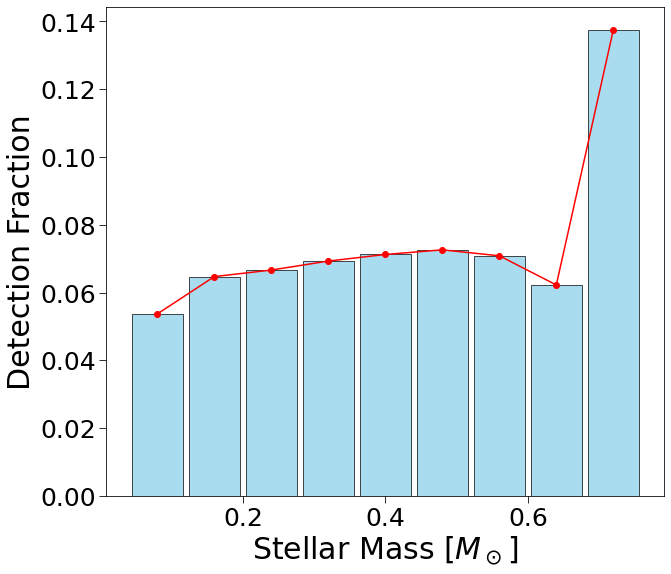

In [60]:
# Convert lists to numpy arrays
n_values_Mstar = np.array(n_values_Mstar)
sensitivity_values_Mstar = np.array(sensitivity_values_Mstar)

bin_width_Mstar = (n_values_Mstar.max() - n_values_Mstar.min()) / len(n_values_Mstar)

# Plot the sensitivity values as a bar graph
fig, axs =  plt.subplots(1,1, figsize=(10, 9))

plt.bar(n_values_Mstar, 
        sensitivity_values_Mstar, 
        color='skyblue', 
        label='Sensitivity',
        width=bin_width_Mstar,
        edgecolor='black',
        alpha=0.7)

# Plot the sensitivity values as a line plot on top of the bar graph
plt.plot(n_values_Mstar, 
         sensitivity_values_Mstar, 
         marker='o', 
         linestyle='-', 
         color='red', 
         label='Sensitivity (line)')

plt.xlabel('Stellar Mass [$M_\odot$]', fontsize=axis_label_font)
plt.ylabel('Detection Fraction', fontsize=axis_label_font)

axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

plt.show()


## $S/N$

In [61]:
print('Min = ', df['S/N'].min())
print('Max = ', df['S/N'].max())

Min =  0.0143129444470995
Max =  29.755899859193168


In [62]:
n_values_SN

NameError: name 'n_values_SN' is not defined

In [63]:
n_values_SN = np.linspace(df['S/N'].min(), 30, num=10)
sensitivity_values_SN = []

# Iterate over each combination of N and n
for n in n_values_SN:
    # Filter the DataFrame based on the current values of N and n
    filtered_df = filtered_df = df[(df['S/N'] > n)]

    # Calculate sensitivity for the filtered DataFrame
    sensitivity = filtered_df['Detection'].mean()  # Assuming detection column contains binary values

    # Print or store the sensitivity along with the current values of N and n
    print(f"We are sensitive to {sensitivity*100:.2f}% Jupiter analog planets with S/N>{n:.2f} ")
    
    sensitivity_values_SN.append(sensitivity)

We are sensitive to 5.45% Jupiter analog planets with S/N>0.01 
We are sensitive to 55.56% Jupiter analog planets with S/N>3.35 
We are sensitive to 65.38% Jupiter analog planets with S/N>6.68 
We are sensitive to 77.78% Jupiter analog planets with S/N>10.01 
We are sensitive to 100.00% Jupiter analog planets with S/N>13.34 
We are sensitive to 100.00% Jupiter analog planets with S/N>16.67 
We are sensitive to 100.00% Jupiter analog planets with S/N>20.00 
We are sensitive to 100.00% Jupiter analog planets with S/N>23.34 
We are sensitive to 100.00% Jupiter analog planets with S/N>26.67 
We are sensitive to nan% Jupiter analog planets with S/N>30.00 


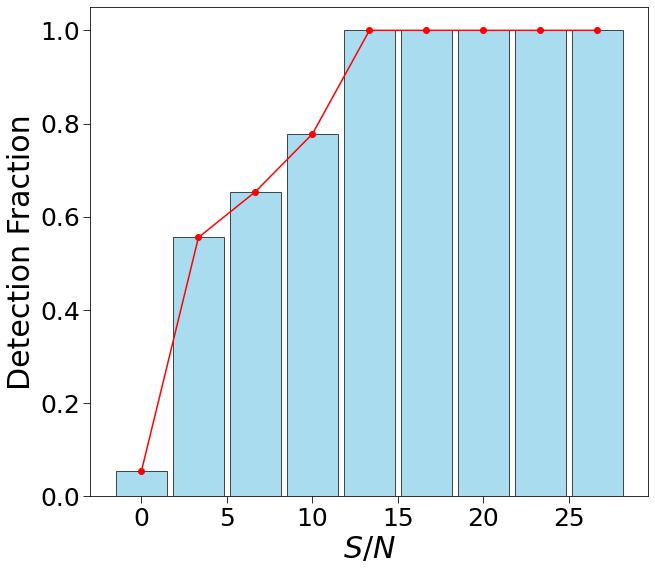

In [64]:
# Convert lists to numpy arrays
n_values_SN = np.array(n_values_SN)
sensitivity_values_SN = np.array(sensitivity_values_SN)

bin_width_SN = (n_values_SN.max() - n_values_SN.min()) / len(n_values_SN)

# Plot the sensitivity values as a bar graph
fig, axs =  plt.subplots(1,1, figsize=(10, 9))

plt.bar(n_values_SN, 
        sensitivity_values_SN, 
        color='skyblue', 
        label='Sensitivity',
        width=bin_width_SN,
        edgecolor='black',
        alpha=0.7)

# Plot the sensitivity values as a line plot on top of the bar graph
plt.plot(n_values_SN, 
         sensitivity_values_SN, 
         marker='o', 
         linestyle='-', 
         color='red', 
         label='Sensitivity (line)')

plt.xlabel('$S/N$', fontsize=axis_label_font)
plt.ylabel('Detection Fraction', fontsize=axis_label_font)

axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

plt.show()


## Distance

In [65]:
print('Min = ', df['Distance'].min())
print('Max = ', df['Distance'].max())

Min =  5.620149134079134
Max =  99.9925758150458


In [66]:
n_values_Distance = np.linspace(0, 100, num=10)
sensitivity_values_Distance = []

# Iterate over each combination of N and n
for n in n_values_Distance:
    # Filter the DataFrame based on the current values of N and n
    filtered_df = filtered_df = df[(df['Distance'] > n)]

    # Calculate sensitivity for the filtered DataFrame
    sensitivity = filtered_df['Detection'].mean()  # Assuming detection column contains binary values

    # Print or store the sensitivity along with the current values of N and n
    print(f"We are sensitive to {sensitivity*100:.2f}% Jupiter analog planets with Distance>{n:.2f} pc")
    
    sensitivity_values_Distance.append(sensitivity)

We are sensitive to 5.24% Jupiter analog planets with Distance>0.00 pc
We are sensitive to 5.21% Jupiter analog planets with Distance>11.11 pc
We are sensitive to 4.97% Jupiter analog planets with Distance>22.22 pc
We are sensitive to 4.53% Jupiter analog planets with Distance>33.33 pc
We are sensitive to 4.09% Jupiter analog planets with Distance>44.44 pc
We are sensitive to 3.63% Jupiter analog planets with Distance>55.56 pc
We are sensitive to 2.92% Jupiter analog planets with Distance>66.67 pc
We are sensitive to 2.46% Jupiter analog planets with Distance>77.78 pc
We are sensitive to 2.02% Jupiter analog planets with Distance>88.89 pc
We are sensitive to nan% Jupiter analog planets with Distance>100.00 pc
